In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean  
import seaborn as sns
import scipy 
import pandas as pd
from matplotlib.patches import Patch
data = np.load("sentinel2_rochester.npy")

#print(data)
#print(data.shape)
#print(data.dtype)

**Problem 1**

Sentinel-2 provides multispectral data across the visible, near-infrared (NIR), and shortwave-
infrared (SWIR) regions. These bands come with different spatial ground sampling distances
(GSD): 10 meters for B2 (Blue), B3 (Green), B4 (Red), and B8 (NIR), 20 meters for several
red-edge and SWIR bands, and 60 meters for atmospheric correction bands; we will delve
more into remote sensing aspect of things in the week 5. For consistency and analysis, all
bands have been resampled to 30 meters. The provided dataset is surface reflectance.
1. Plot each of the 12 Sentinel-2 bands separately, ensuring that you identify what each
band corresponds to in terms of its wavelength. Use a vibrant colormap, like cmcocean library. 
2. What is your approach to a proper visualization in terms of stretching (implement
this in your visualization)? 
3. You can see part of the image is considered no data, how would you go about that? (you will use this in the following problems as well)

In [2]:
bands = {
    0: 'B1, Coastal Aerosol, 443nm',
    1: 'B2, Blue, 490nm',
    2: 'B3, Green, 560nm',
    3: 'B4, Red, 665nm',
    4: 'B5, Vegetation Red Edge, 705nm',        
    5: 'B6, Vegetation Red Edge, 740nm',
    6: 'B7, Vegetation Red Edge, 783nm',
    7: 'B8, NIR, 842nm',
    8: 'B8A, Narrow NIR, 865nm',
    9: 'B9, Water Vapor, 945nm',
    10: 'B11, SWIR, 1610nm',
    11: 'B12, SWIR, 2190nm'
}   

#data[data == 0] = np.nan

In [3]:
def plot_band(fig, axs, band, title, stretch=(5, 95)):
    band_data = band.astype(float)
    #band_data = band
    band_data[band_data == 0] = np.nan
    vmin, vmax = np.nanpercentile(band_data, stretch)
    im = axs.imshow(band_data, cmap=cmocean.cm.topo, vmin=vmin, vmax=vmax)
    axs.set_title(title)
    axs.axis('off')
    axs.get_figure().colorbar(im, ax=axs, label = 'reflectance')



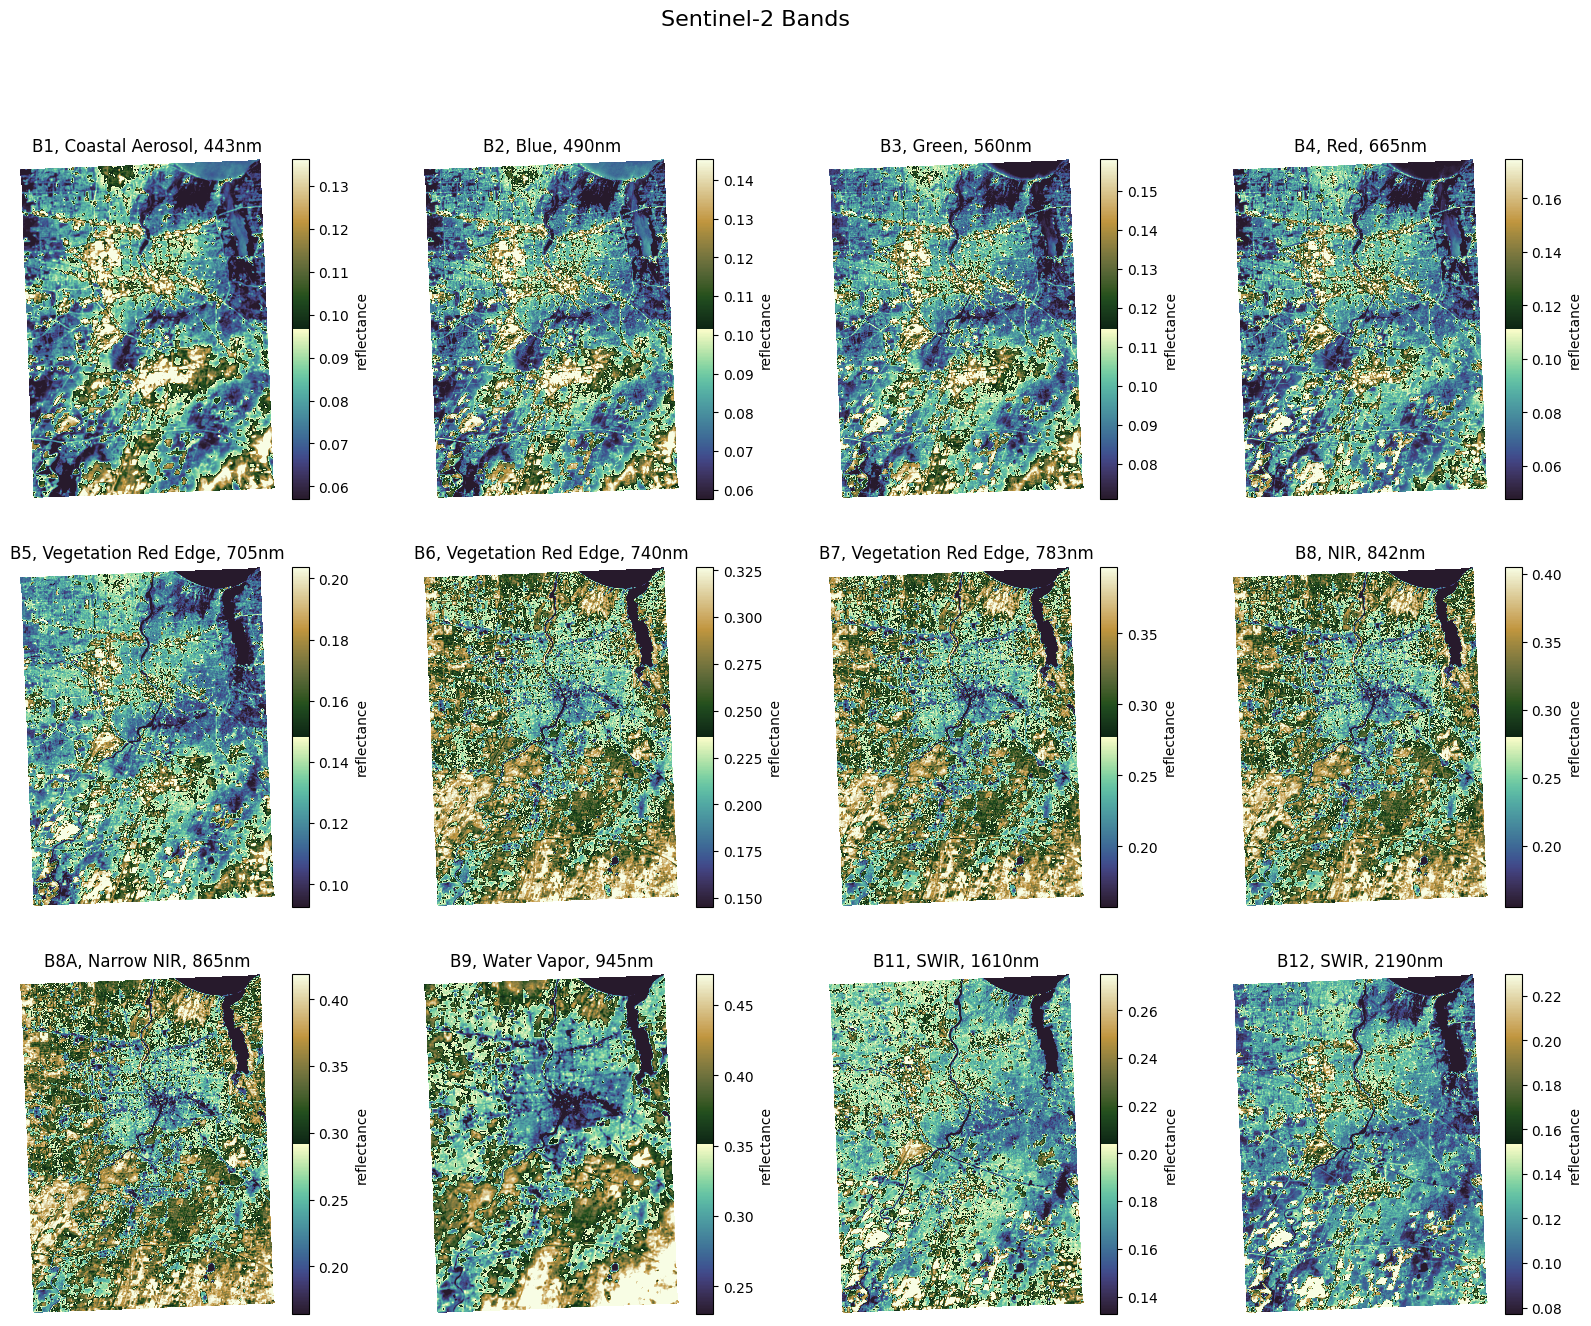

In [4]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Sentinel-2 Bands', fontsize=16)
axs = axs.flatten()

for i in range(data.shape[2]):
    plot_band(fig, axs[i], data[:, :, i], bands[i])

plt.show()




The sentinel2_rochester.npy contains multispectral data acrooss the NIR and SWIR regions of Rochester, NY. In the figure above, we have plotted 12 sentinel 2 bands (excluding band 10) using cmocean. These bands were resampled to 30 meters for consistency. In order to approcah proper visualization in terms of stretching, we have implemented triming by removing the 5th and 95th percentiles of each sentinel band. This removes data below the 5th percentile and 95th percentiles to address the problem of outliers, removing noise, and increases the contrast of the data for a clear image. Additionally, some areas of the image are considred "no data." In order to remove this problem, we have the removed the 0s and changed them with NaNs. This allows the function to ignore the 0 values instead of taking them into account as data. 

**Problem 2**

a. 
Given the multi-spectral data for each band, define the function below that takes each
band (treated as an independent random variable) and calculates the following statistics:
mean, standard deviation (std), minimum, maximum, quartiles (Q1, median, Q3), as well
as skewness and kurtosis which was not covered in class. Explain what each of the statistics
explain. Provide the statistics for all bands and all statistics as a table.

In [5]:
def calculate_band_statistics(band):
    band_data = band.astype(float)
    band_data = band_data[band_data != 0]  
    min = np.min(band_data)
    max = np.max(band_data)
    mean = np.mean(band_data)
    median = np.median(band_data)
    std = np.std(band_data)
    q1 = np.quantile(band_data, 0.25)
    q3 = np.quantile(band_data, 0.75)
    skew = scipy.stats.skew(band_data, axis=None)
    kurtosis = scipy.stats.kurtosis(band_data, axis=None)
    return min, max, mean, median, std, q1, q3, skew, kurtosis

In [6]:
data_stats = []
for i in range(data.shape[2]):
    min, max, mean, median, std, q1, q3, skew, kurtosis = calculate_band_statistics(data[:, :, i])
    data_stats.append([bands[i], min, max, mean, median, std, q1, q3, skew, kurtosis])


stats_df = pd.DataFrame(data_stats, columns= ['Band', 'Min', 'Max', 'Mean', 'Median', 'Standard Deviation', 'Q1', 'Q3', "Skewness", "Kurtosis"])
print(stats_df)

                              Band     Min     Max      Mean  Median  \
0       B1, Coastal Aerosol, 443nm  0.0333  0.6021  0.088682  0.0829   
1                  B2, Blue, 490nm  0.0386  0.7542  0.092542  0.0853   
2                 B3, Green, 560nm  0.0430  0.7484  0.105496  0.0987   
3                   B4, Red, 665nm  0.0326  0.7728  0.094311  0.0850   
4   B5, Vegetation Red Edge, 705nm  0.0346  0.8159  0.136721  0.1310   
5   B6, Vegetation Red Edge, 740nm  0.0176  0.7830  0.243593  0.2472   
6   B7, Vegetation Red Edge, 783nm  0.0161  0.7859  0.285838  0.2903   
7                   B8, NIR, 842nm  0.0188  0.9030  0.291384  0.2976   
8           B8A, Narrow NIR, 865nm  0.0157  0.7689  0.303507  0.3098   
9           B9, Water Vapor, 945nm  0.0653  0.6934  0.345083  0.3446   
10               B11, SWIR, 1610nm  0.0218  0.8196  0.191718  0.1889   
11               B12, SWIR, 2190nm  0.0205  0.9295  0.129180  0.1204   

    Standard Deviation      Q1      Q3  Skewness   Kurtosis  
0

The min, max, mean, median, standard deviation, 1st quartile, 3rd quartile, skewness, and kurtosis has been caluclated for each band and placed in the table above. Here are the explanations for each statistic and what it represents: 
- Band: The type of band being used, as well as its wavelength. 
- Min: The smallest amount of reflectance value wihtin each band. 
- Max: The largest amount of reflectance value within each band.
- Mean: The average of the reflectance balance within each band. 
- Median: The middle value of reflectance within each band. 
- Standard Deviation: The spread of the reflectance within each band. 
- 1st Quartile (Q1): The median value of the lower half of the dataset. 25% of the reflectance values for each band is below this measure. 
- 3rd Quartile (Q3): The median value of the greater half of the data set. 75% of the reflectance values for each band is below this measure. 
- Skewness: The skewness is the numerican value of the symmetry of the data for each band. If the skewness is 0, it means the data is perfectly symmetrical. A positive skewness value tells us that there is right skew while a negative skewness tells us that there is a left skew. 
- Kurtosis: Kurtosis is a numerical measure of the tail. If there is high Kurtosis number, it means that there is lower peak of the data with a longer tail, indicating that there are more extreme values.

b. Define another function called to standardize the data for each band. This function
should compute the z-scores for all pixel values in the band. Explain what standardization
does to your data. Plot the histogram for each band’s original data and use the standardize
data to highlight the outliers. This approach helps to better understand the distribution of
the data and identify any anomalies present.

In [7]:
def standardize(data):
    data = data.astype(float)
    data = data[data != 0]
    
    return scipy.stats.zscore(data)

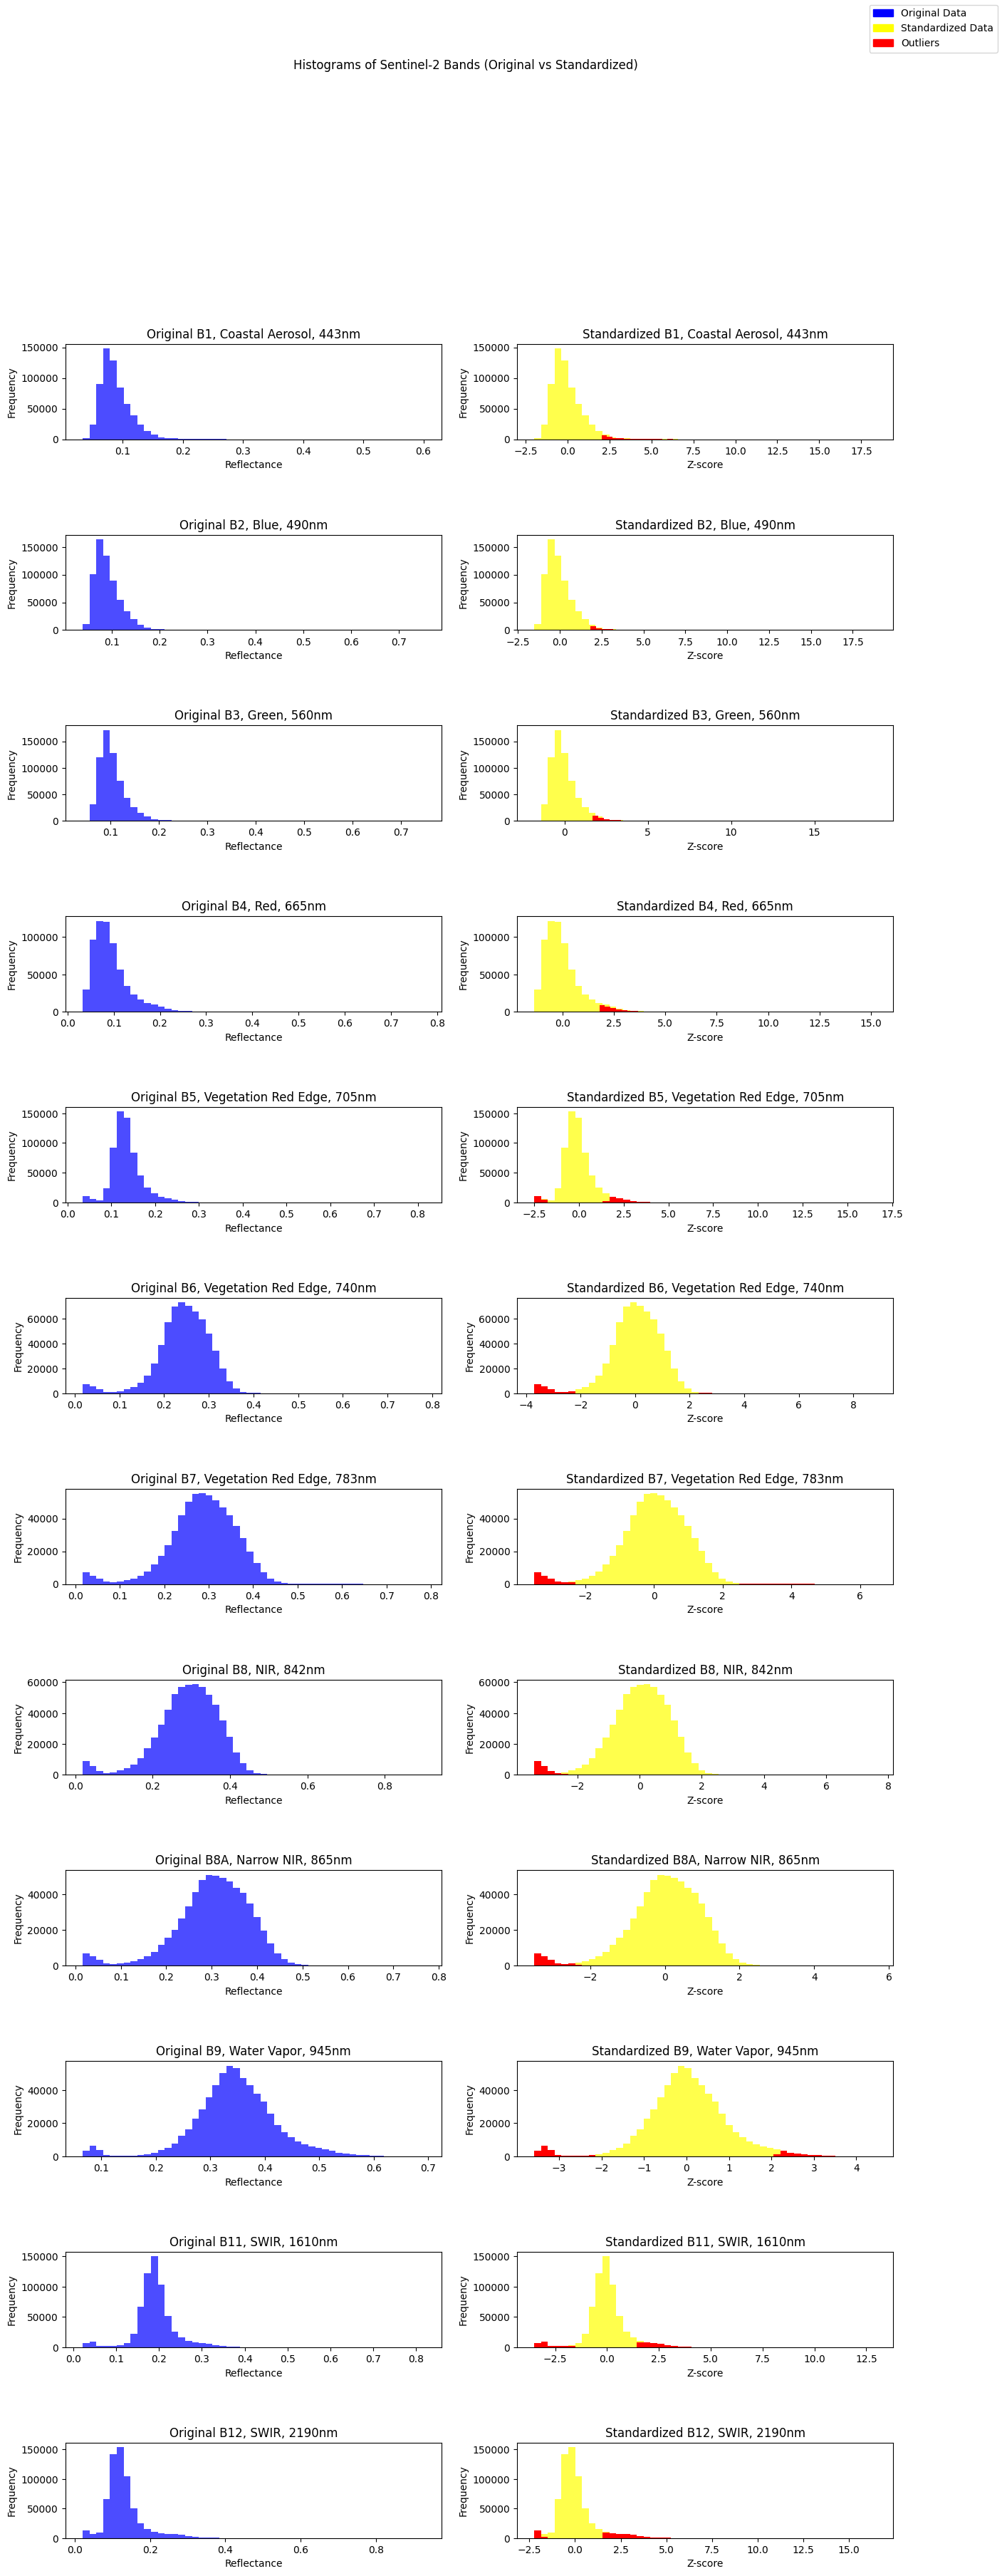

In [8]:
z_scores =[]

for i in range(data.shape[2]):
    z_score = standardize(data[:, :, i].flatten())
    z_scores.append(z_score)        


fig, axs = plt.subplots(12, 2, figsize=(15,40))
fig.suptitle('Histograms of Sentinel-2 Bands (Original vs Standardized)')
for i in range(data.shape[2]):
    axs[i, 0].hist(data[:, :, i][data[:, :, i] != 0].flatten(), bins=50, color='blue', alpha=0.7)
    axs[i, 0].set_title(f'Original {bands[i]}')
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].set_xlabel('Reflectance')
    
    
    min, max, mean, median, std, q1, q3, skew, kurtosis = calculate_band_statistics(z_scores[i])
    iqr = q3-q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    outlier = z_scores[i][(z_scores[i] < lb) | (z_scores[i] > ub)]
    axs[i, 1].hist(z_scores[i], bins=50, color='yellow', alpha=0.7)

    axs[i, 1].hist(outlier, bins=50, color='red', label='Outliers')
    axs[i, 1].set_title(f'Standardized {bands[i]}')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].set_xlabel('Z-score')



#axs[11, 1].set_xlabel('Z-Score')
legend = [
    Patch(color='blue', label='Original Data'),
    Patch(color='yellow', label='Standardized Data'),
    Patch(color='red', label='Outliers')
]
fig.legend(handles=legend, loc='upper right')
plt.subplots_adjust(hspace=1)
#plt.legend()

In the above graphs, we have plotted the Original Data on the left column while standardizing the original data to plot a standardized graph on the right. The blue plot is for the original data, the yellow plot is for the standardized data, and the red plot is for the outliers found in the standardized data. Standardizing the data allows us to compare each of the bands by calculating their z-scores (how far they are from the mean). The data is now centered around 0 (the mean for each band) and we can see the spread of each data relative to its mean instead of the actual reflectance. 

**Problem 3**

a. We aim to explore the relationships between variables in the multispectral data. First,
use the concept of the Pearson r correlation coefficient, as discussed in class, to compute the
correlation matrix for all bands. Plot this matrix as an image, where each cell represents
the correlation between two bands. What type of matrix is this? Analyze the relationships
between variables and describe what the correlation coefficients reveal about their linear
relationships.

In [9]:
def correlation_matrix(data):
    reshaped_data = data.reshape(-1, data.shape[2])
    #print(reshaped_data.shape)
    corr_matrix = np.corrcoef(reshaped_data, rowvar=False)
    return corr_matrix

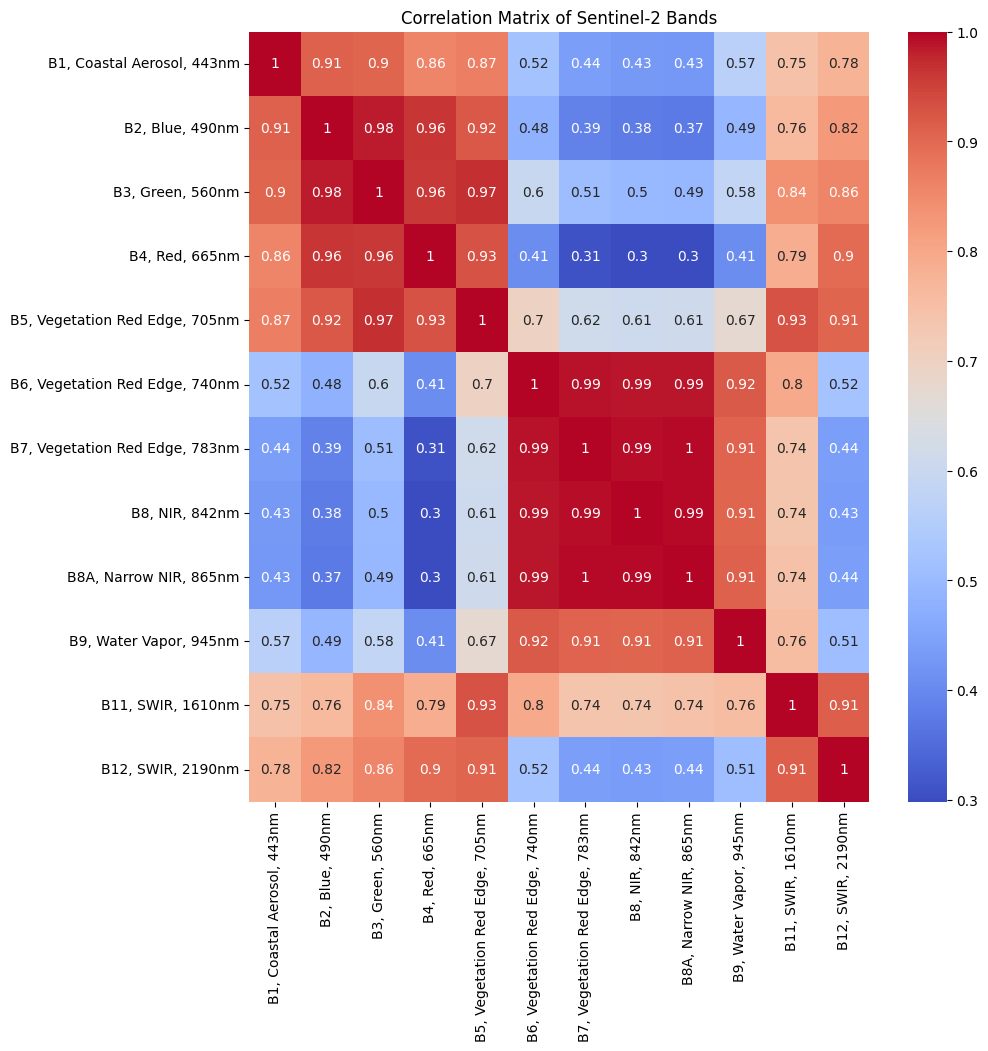

In [10]:
corr_matrix = correlation_matrix(data)
#print(corr_matrix)
#print(corr_matrix.shape)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, xticklabels=[bands[i] for i in range(data.shape[2])], yticklabels=[bands[i] for i in range(data.shape[2])], annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Sentinel-2 Bands')
plt.show()

In the above graphic we have created a correlation matrix amongst the bands. The matrix above has symmetry along the diagonal, meaning that if we do the comparison of x and y, it will be the same as y and x. The diagonal is comparing each band to itself, showing that there is a perfect correlation between two of the same bands. The rest of the matrix shows the correlation of two bands with values between -1 and 1. The closer it is to 1, it means that there is a strong, positive linear relationship between the two. The closer it is to -1, it means that there is a strong, negative linear relationship. In the case of our data, if two of our bands have a strong, positive correlation, it means that the data is redundant, showing us similar data and plots close to identical. Values closer to 0 means the data between the two bands are unique, showing us different features. 

b. For the 10-meter bands (B2, B3, B4, and B8), define a function that creates two subplots:
the first displaying a pairwise scatter plot between every two vectors, and the second showing
the density of scatter plot points in the scatter plot. The density plot is particularly useful for
visualizing areas where data points are more concentrated (there is more than one technique
to this; pick your favorite). Analyze the observed patterns and describe any significant trends
or clusters in the data.

In [11]:
def correlation_plot(data, b1Index, b2Index):
    band1 = data[:, :, b1Index].astype(float)
    band2 = data[:, :, b2Index].astype(float)
    
    df_filtered = pd.DataFrame(
        {
            'band1': band1.flatten(),
            'band2': band2.flatten()
        }
    )
    name1 = bands[b1Index]
    name2 = bands[b2Index]


    df_filtered = df_filtered[(df_filtered['band1'] != 0) & (df_filtered['band2'] != 0)]

    fig , axs = plt.subplots(1, 2, figsize=(20,10))        
    fig.suptitle(f'Correlation between {bands[b1Index]} and {bands[b2Index]}')
    sns.scatterplot(data=df_filtered, x='band1', y='band2', ax=axs[0], alpha=0.5)
    axs[0].set_title('Scatter Plot')
    axs[0].set_xlabel(name1)
    axs[0].set_ylabel(name2)
    axs[1].set_title("Hexbin Plot")
    axs[1].set_xlabel(name1)
    axs[1].set_ylabel(name2)
    axs[1] = plt.hexbin(band1, band2, gridsize=25)
    fig.colorbar(axs[1], label='Count in bin')





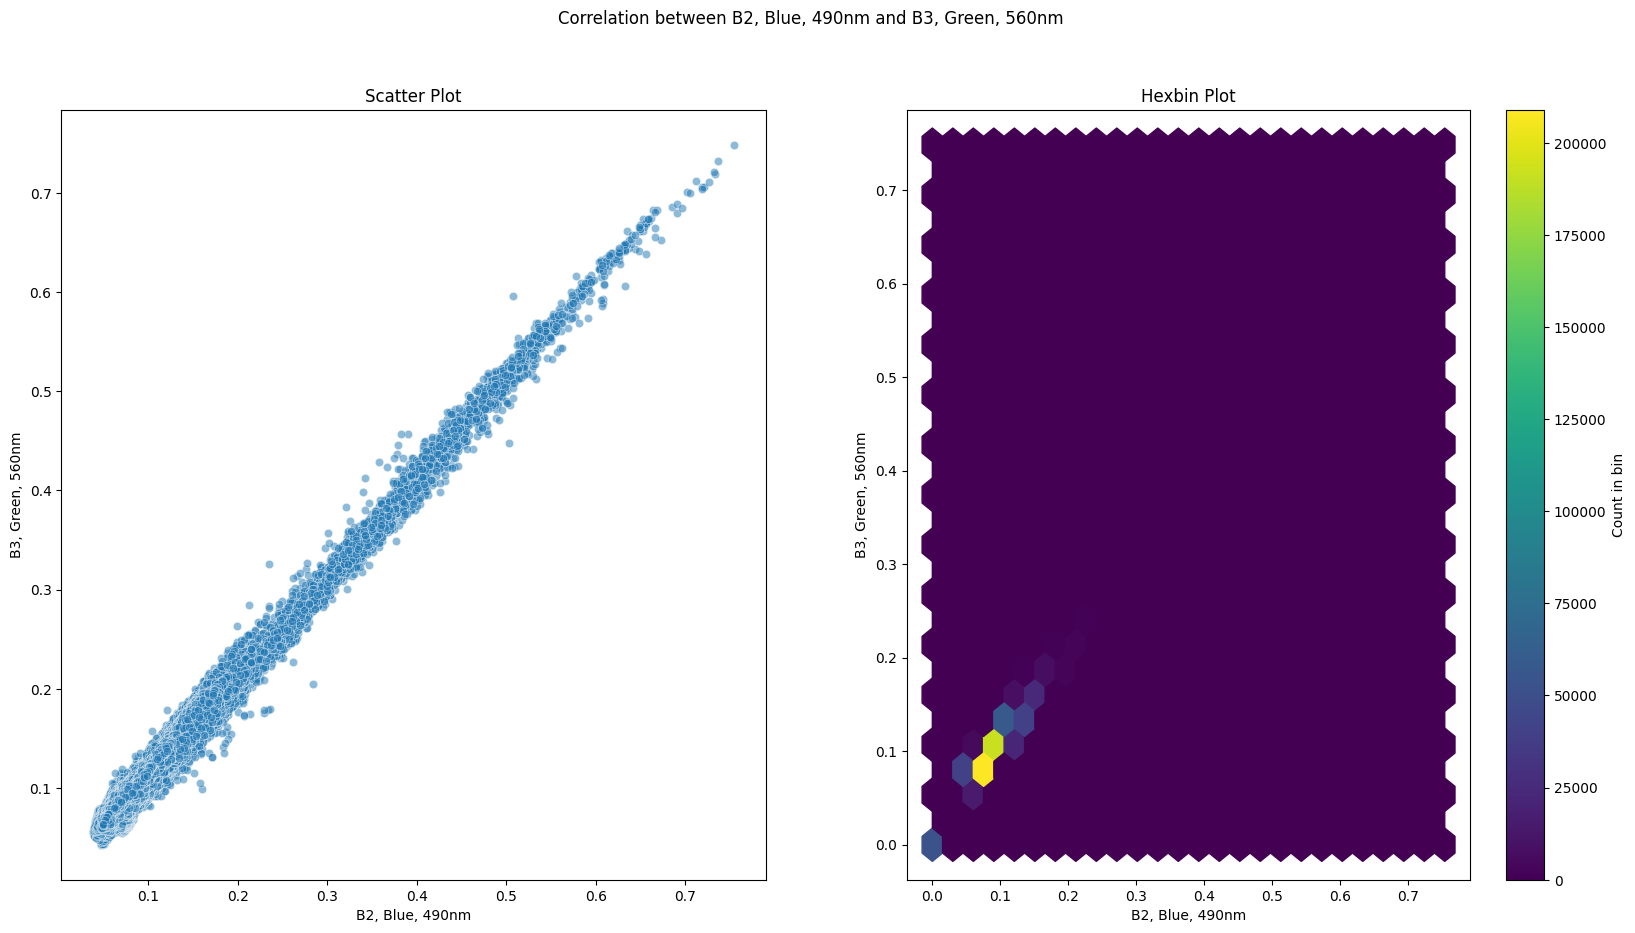

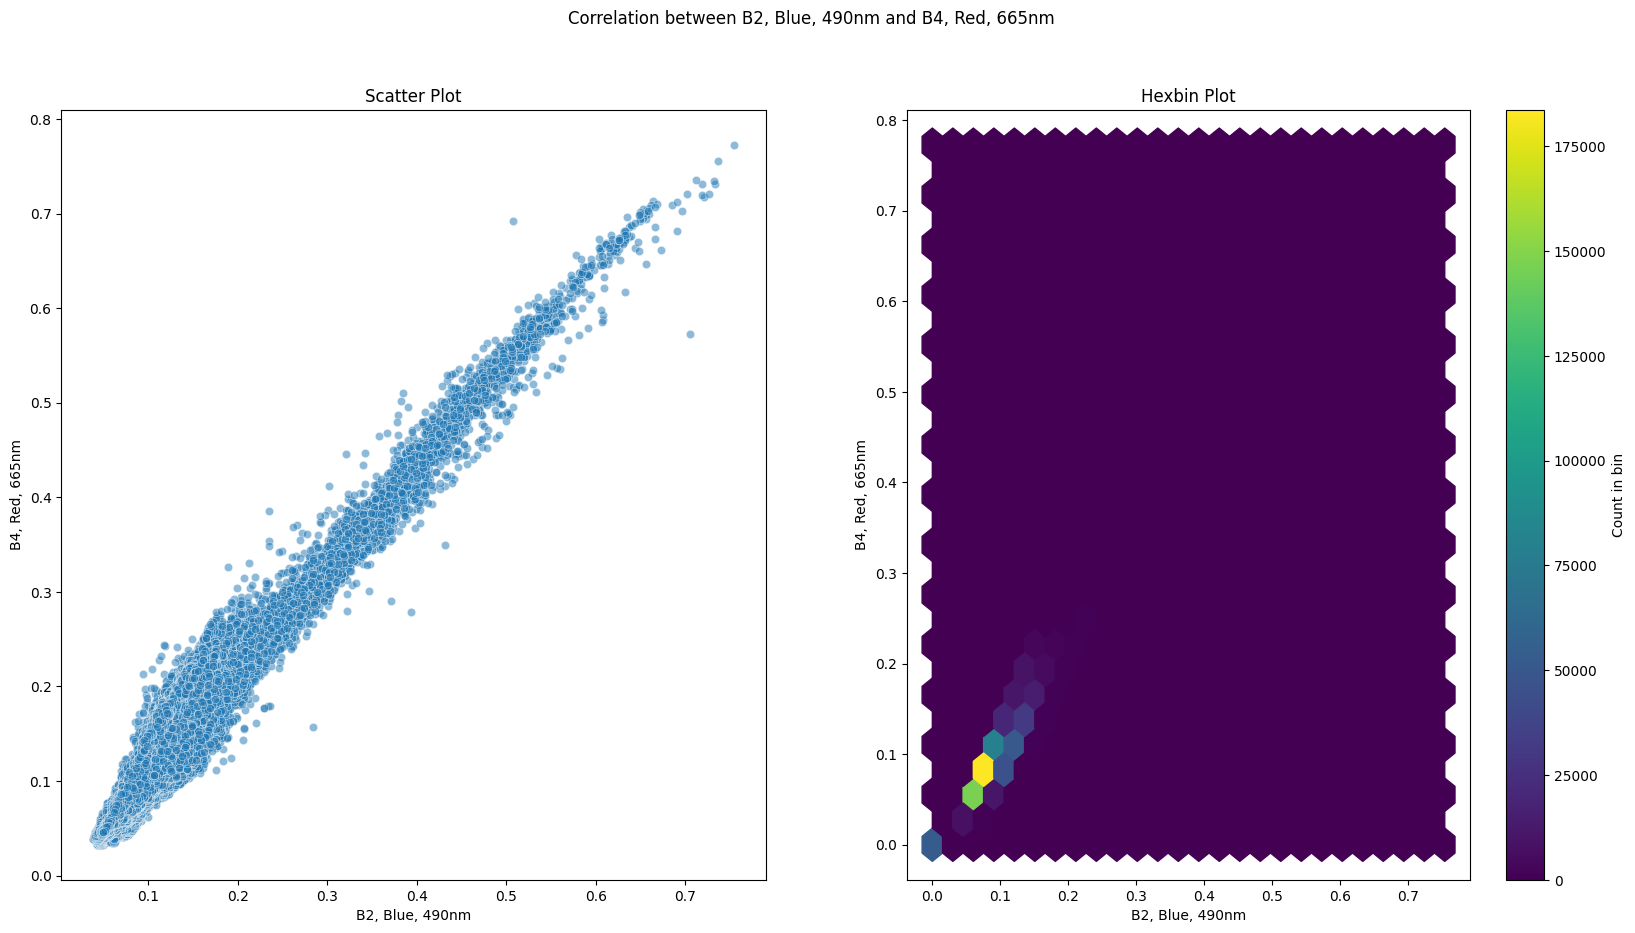

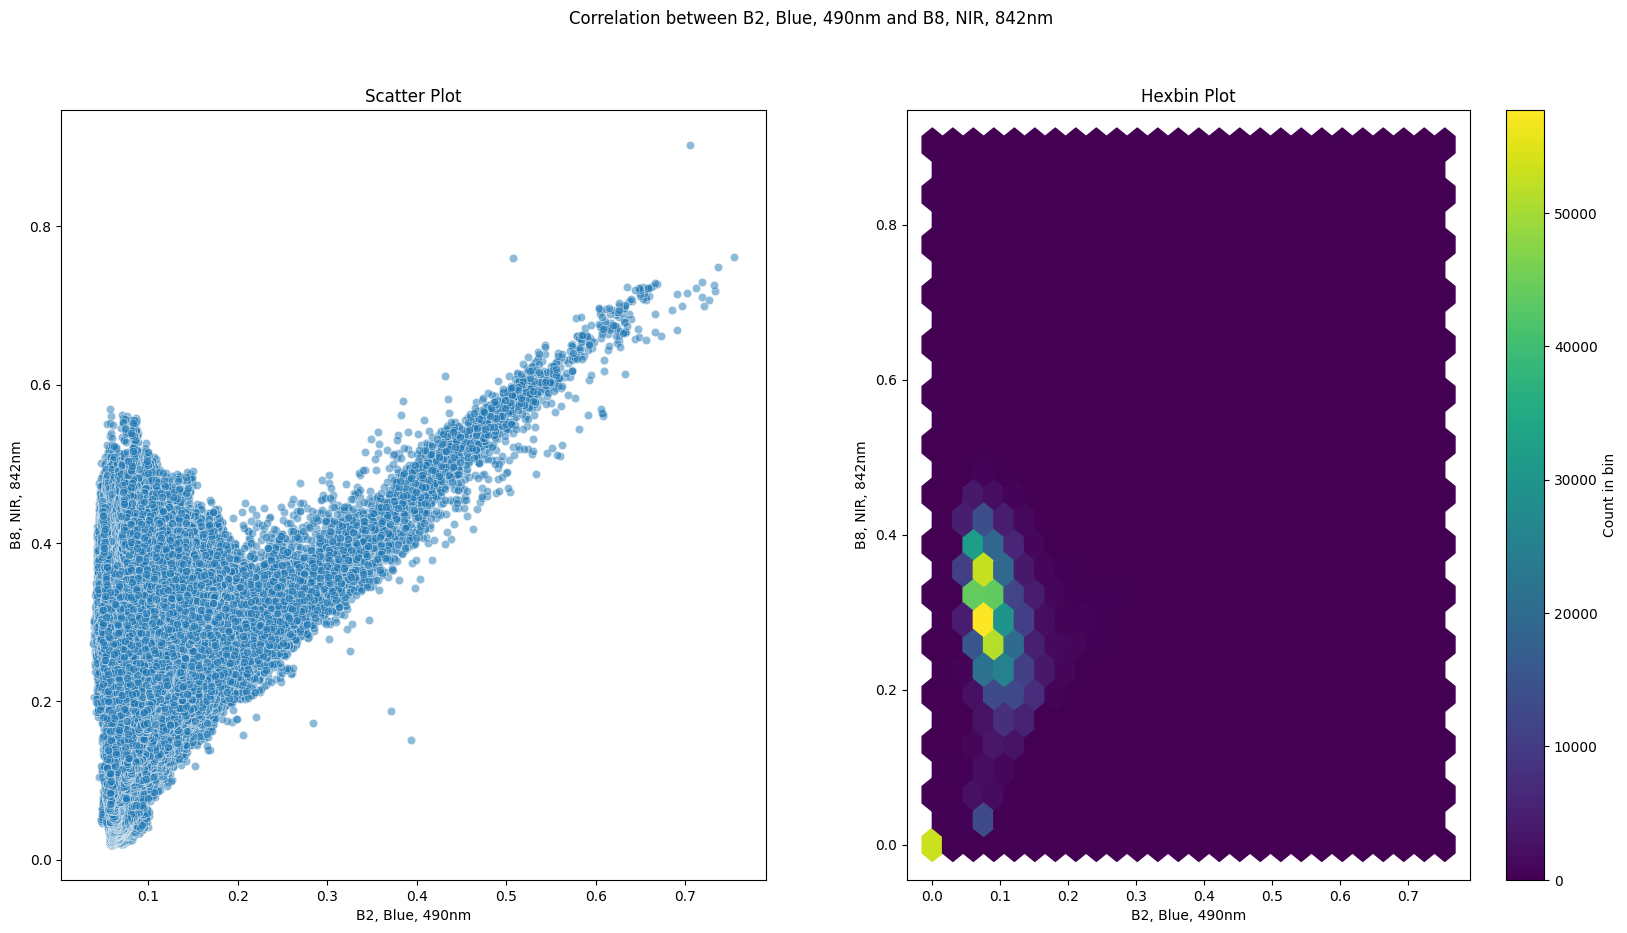

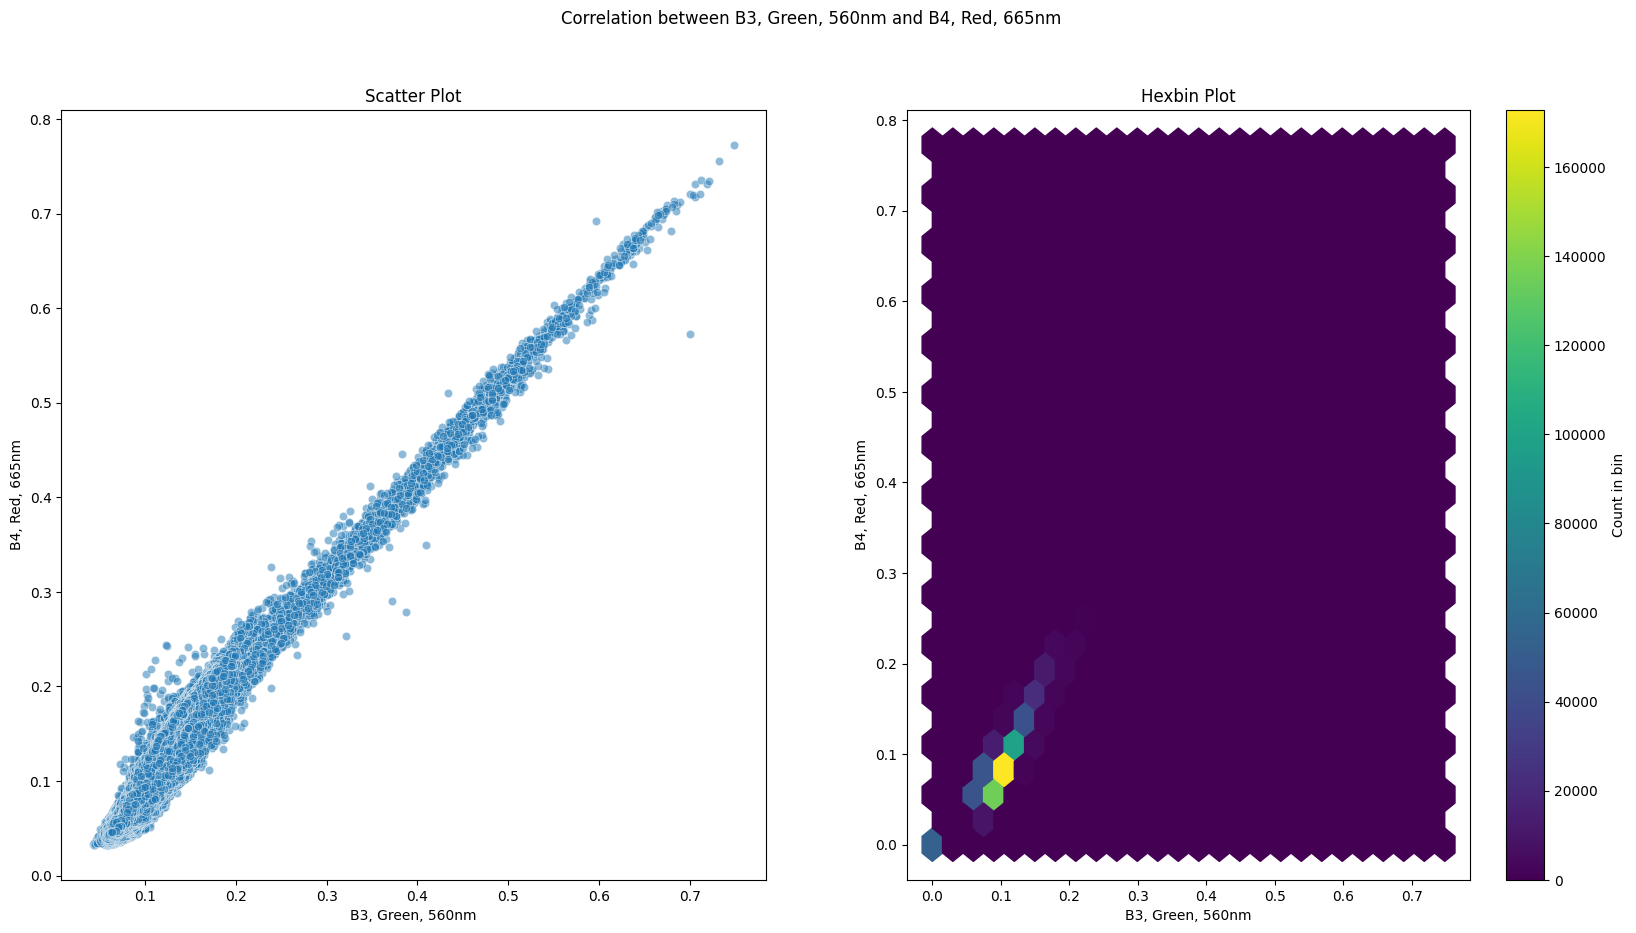

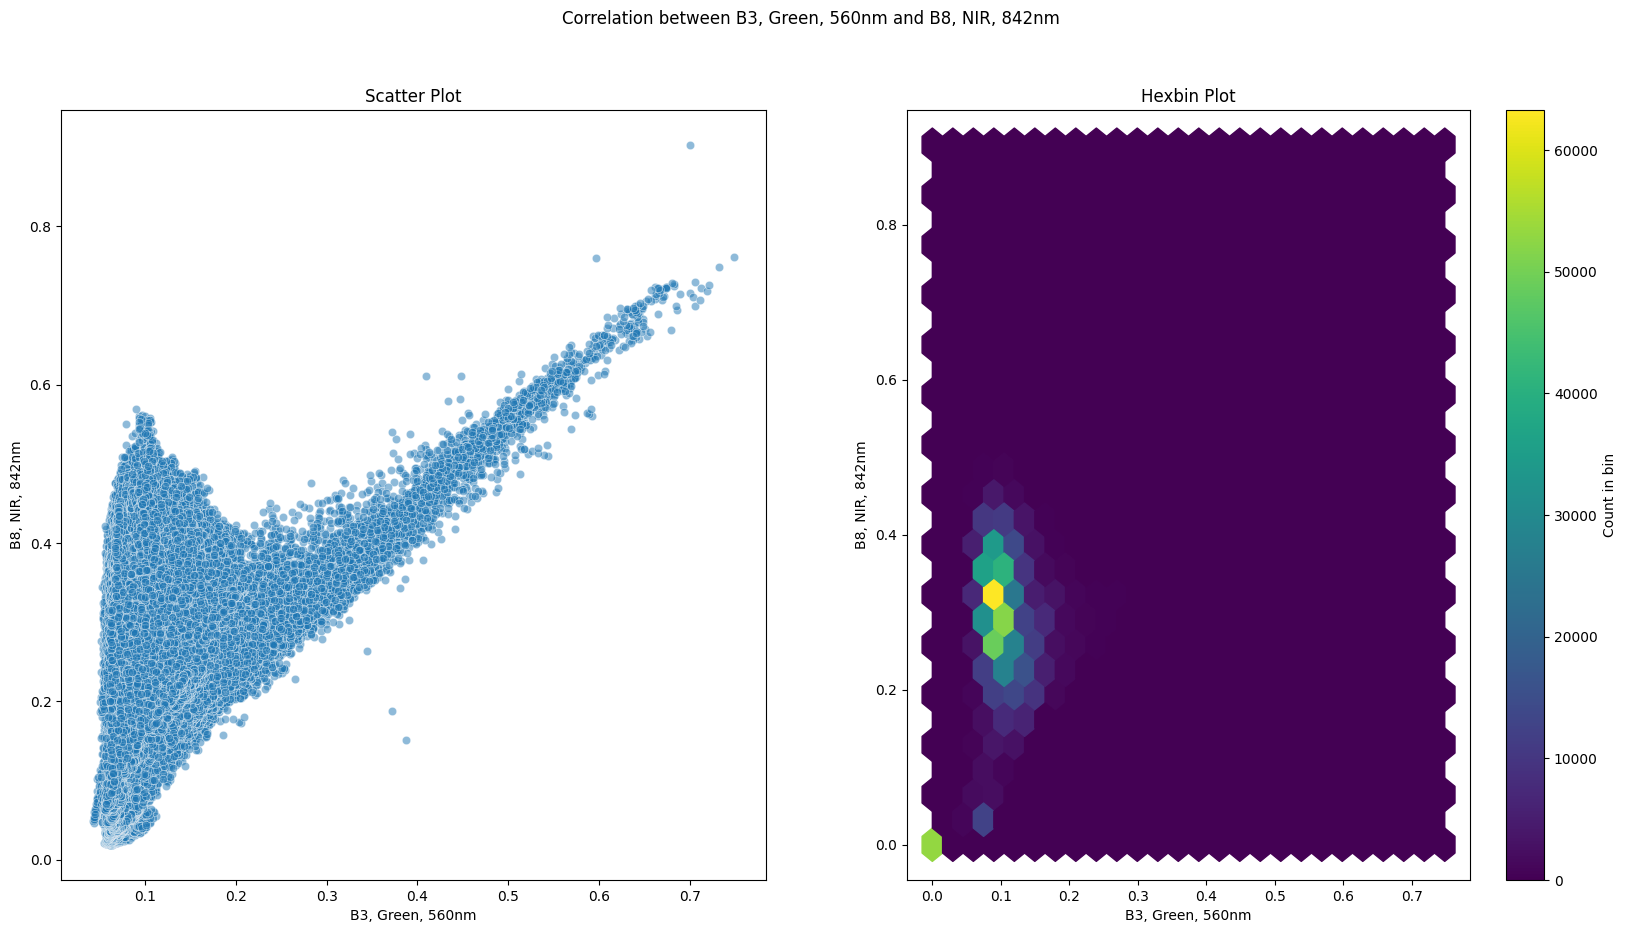

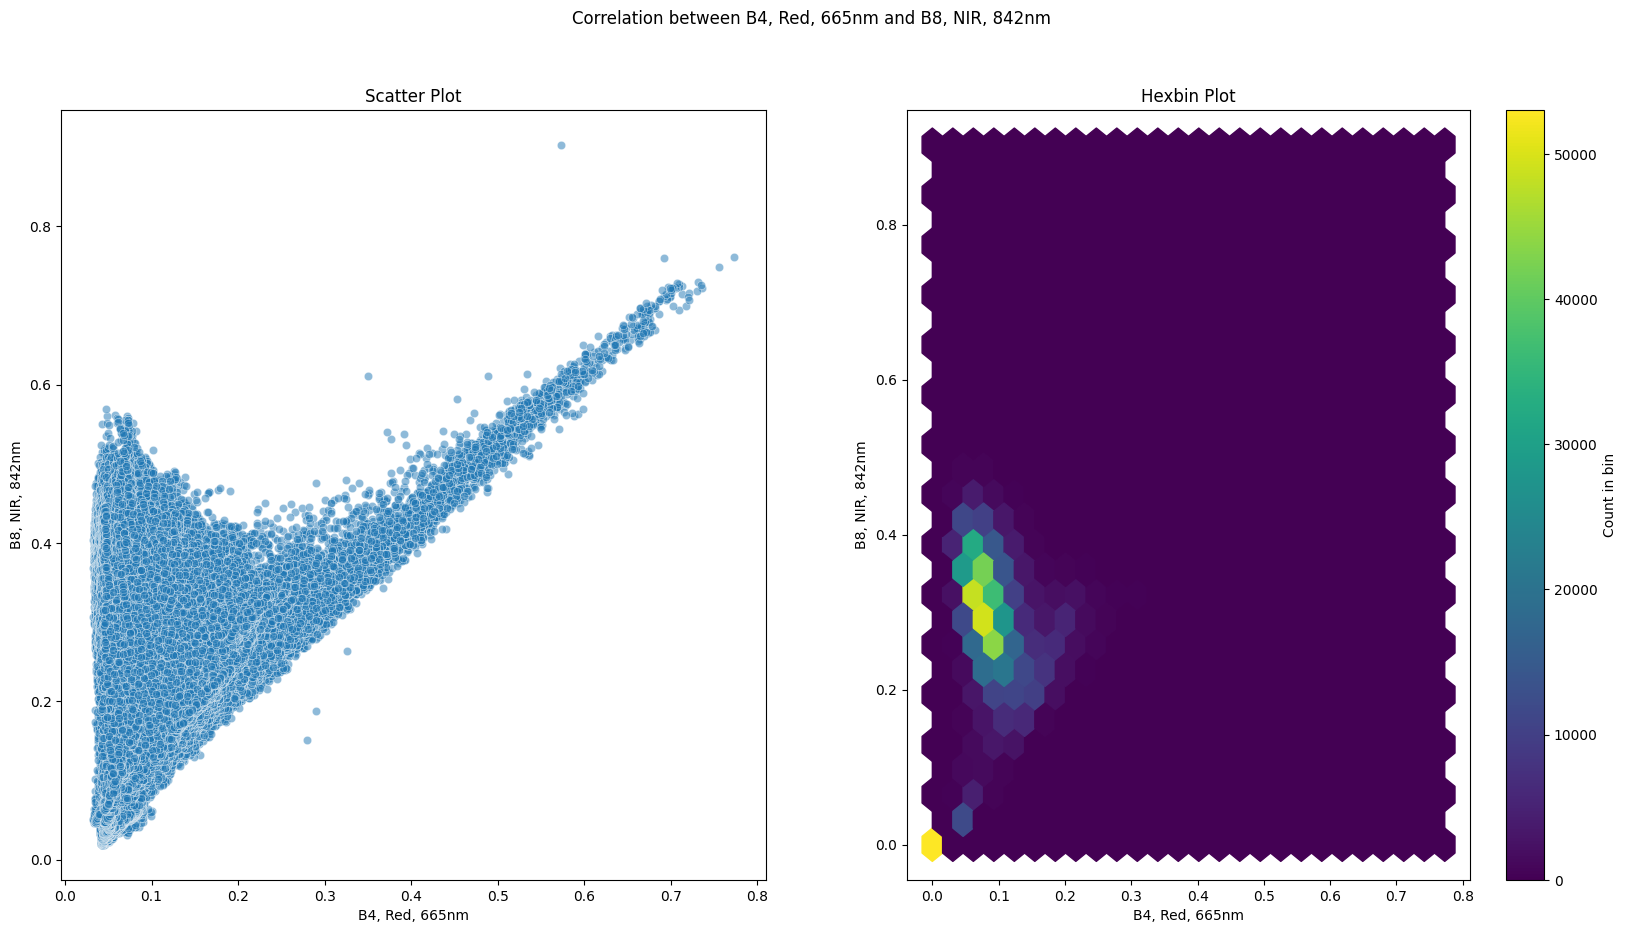

In [12]:
index = [1, 2, 3, 7]
for i in range(len(index)):
    for j in range(i+1, len(index)):
        correlation_plot(data, index[i], index[j])


We created two subplots: the subplots on the left are the pairwise scotter plots between every two vectors while the right plots are the hexbin plots to visualize the density within each region of the data. When comparing bands B2 and B3, B3 and B4, and B2 and B4, the bands seems to have a positive linear relationship, whilst also having similar amounts of data in each region when looking at the hexbin plots. However, when we look at the B8 bands, we can see that whenever we compare the other bands (B2, B3, B4), the plots are are generally positive but less linear. Both plots comparing B8 bands create a wedge shaped pattern with most of the data clustered towards the bottom left of both graphs. 

**Problem 4**

The spectral library data must be spectrally downsampled to the Sentinel-2 bands (Sentinel-
2 bands). Use the concept of cosine similarity to identify the first 100 pixels in Sentinel-2
data that have the lowest spectral angle (the obtained angle in the cosine similarly) when
compared to the ECOSTRESS samples. Plot the spectra of the 1st, 50th, and 100th clos-
est matches alongside the original ECOSTRESS spectra. Analyze how closely the matches
resemble the ECOSTRESS data and explain the similarities or differences. Pick a cut off
angle and use that as a threshold to grab all the vegetation/road pixels in your sentinel-2
imagery. Represent the pixels you have identified in the image with your favorite approach.

In [13]:
used_data = data[:, :, [1, 2, 3, 4, 5, 6, 7, 8, 10, 11]]
new_bands =  {
    0: 'B2, Blue, 490nm',
    1: 'B3, Green, 560nm',
    2: 'B4, Red, 665nm',
    3: 'B5, Vegetation Red Edge, 705nm',        
    4: 'B6, Vegetation Red Edge, 740nm',
    5: 'B7, Vegetation Red Edge, 783nm',
    6: 'B8, NIR, 842nm',
    7: 'B8A, Narrow NIR, 865nm',
    8: 'B11, SWIR, 1610nm',
    9: 'B12, SWIR, 2190nm'
}   

wl = {
    0: 0.490,
    1: 0.560,
    2: 0.665,
    3: 0.705,
    4: 0.740,
    5: 0.783,
    6: 0.842,
    7: 0.865,
    8: 1.610,
    9: 2.190
}

#print(new_bands)
temp_asphalt = pd.read_csv('asphalt.txt', delim_whitespace=True, header=None, names=['Wavelength', 'Reflectance'], skiprows=21)
trees = pd.read_csv('quercus_genus.txt', delim_whitespace=True, header=None, names=['Wavelength', 'Reflectance'], skiprows=21)
asphalt2 = temp_asphalt[(temp_asphalt['Wavelength'] >= 0.35)].copy()
asphalt = asphalt2[asphalt2['Wavelength'] <= 2.5].copy()



asphalt['Reflectance'] = asphalt['Reflectance'] / 100.00
trees['Reflectance'] = trees['Reflectance'] / 100.00

#print(asphalt)
#print(trees)


/var/folders/_j/sz2t12g12830nbcndgqjw6hr0000gn/T/ipykernel_34212/2372974121.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  temp_asphalt = pd.read_csv('asphalt.txt', delim_whitespace=True, header=None, names=['Wavelength', 'Reflectance'], skiprows=21)
/var/folders/_j/sz2t12g12830nbcndgqjw6hr0000gn/T/ipykernel_34212/2372974121.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  trees = pd.read_csv('quercus_genus.txt', delim_whitespace=True, header=None, names=['Wavelength', 'Reflectance'], skiprows=21)


First let's prepare the data. We downloaded the data for Asphalt and Oak from the JPL Spectral Library. We then turned those into dataframes which only contain the wavelenghts between 0.35 and 2.5 microns. The reflectance was then divided by 100. For the sentinel 2 data, we removed the bands affected by atmospheric water absorption and aerosols. Next, we must downsample the ECOSTRESS samples. 

In [14]:
def downsample(df, targets):
    downsample = []
    for wl in targets: 
        index = (df['Wavelength'] - wl).abs().idxmin()
        #print(index)
        downsample.append(df.loc[index, 'Reflectance'])
    return downsample

In [15]:
ds_asphalt = downsample(asphalt, list(wl.values()))
ds_trees = downsample(trees, list(wl.values()))

#print(ds_asphalt)
#print(ds_trees)

We have successfully downsampled the ECOSTRESS samples of asphalt and trees to match the Sentinel-2 Bands. We must next use the concept of cosine similarity to identify the first 100 pixels in the Sentinel-2 data that have the lowest spectral angle when compared to the ECOSTRESS samples. 


In [16]:
def sam(v1, v2): 
    cosine_distance = scipy.spatial.distance.cosine(v1, v2)
    cosine_similarity = 1 - cosine_distance
    angle = np.arccos(cosine_similarity)
    return angle


In [17]:
rows, cols, bands = used_data.shape
pixels = rows * cols
reshaped_data = used_data.reshape((pixels, bands))

valid_pixels = np.all(reshaped_data > 0, axis=1)
valid_data = reshaped_data[valid_pixels]



asphalt_angles = []
tree_angles = []

for pixel in valid_data: 
    asphalt_angle = sam(ds_asphalt, pixel)
    asphalt_angles.append(asphalt_angle)
    tree_angle = sam(ds_trees, pixel)
    tree_angles.append(tree_angle)

asphalt_angles = np.array(asphalt_angles)
tree_angles = np.array(tree_angles)

#print(asphalt_angles.shape)
#print(tree_angles.shape)

#asphalt_angles.sort()
#tree_angles.sort()

#sphalt_100 = asphalt_angles[:100]
#print(asphalt_100.shape)
#tree_100 = tree_angles[:100]
asphalt_100_indexes = np.argsort(asphalt_angles)[:100]
tree_100_indexes = np.argsort(tree_angles)[:100]

We calculated the first 100 pixels of the Sentinel-2 Data that have the lowest spectral angles when compared to the ECOSTRESS Samples. 

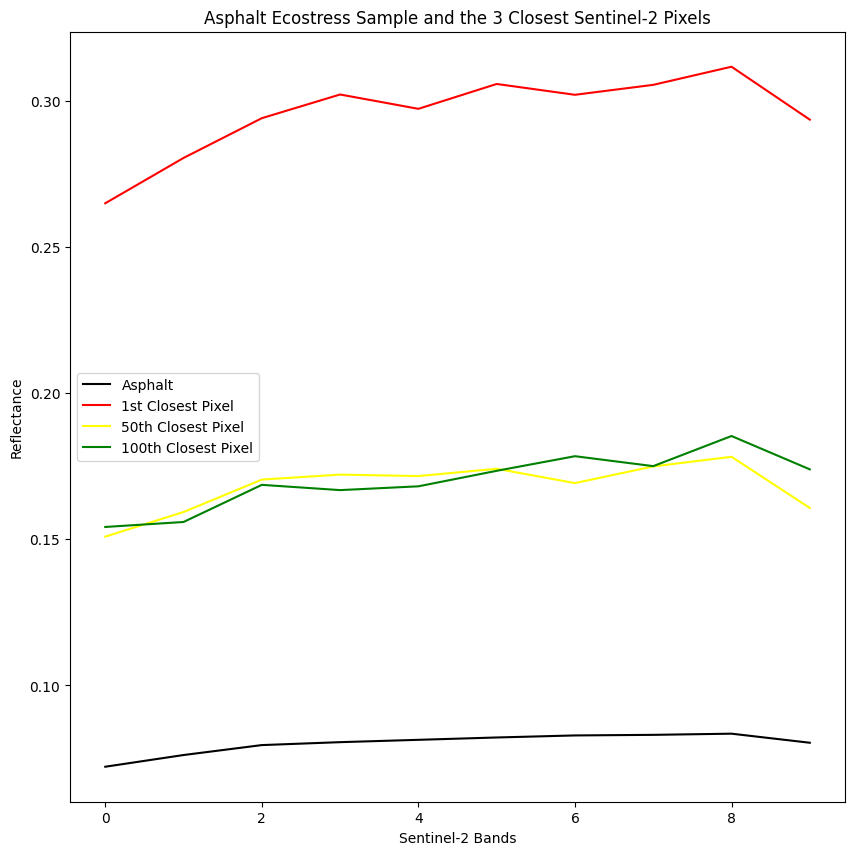

In [18]:
plt.figure(figsize=(10,10))
#print(ds_asphalt)
#print(valid_data[asphalt_100_indexes[0]])
#print(valid_data[asphalt_100_indexes[49]])
#print(valid_data[asphalt_100_indexes[99]])
plt.plot(new_bands.keys(), ds_asphalt, color='black', label='Asphalt')
plt.plot(new_bands.keys(), valid_data[asphalt_100_indexes[0]], color='red', label='1st Closest Pixel')
plt.plot(new_bands.keys(), valid_data[asphalt_100_indexes[49]], color='yellow', label='50th Closest Pixel')
plt.plot(new_bands.keys(), valid_data[asphalt_100_indexes[99]], color='green', label='100th Closest Pixel')
plt.legend()
plt.title("Asphalt Ecostress Sample and the 3 Closest Sentinel-2 Pixels")
plt.ylabel('Reflectance')
plt.xlabel('Sentinel-2 Bands')
plt.show()

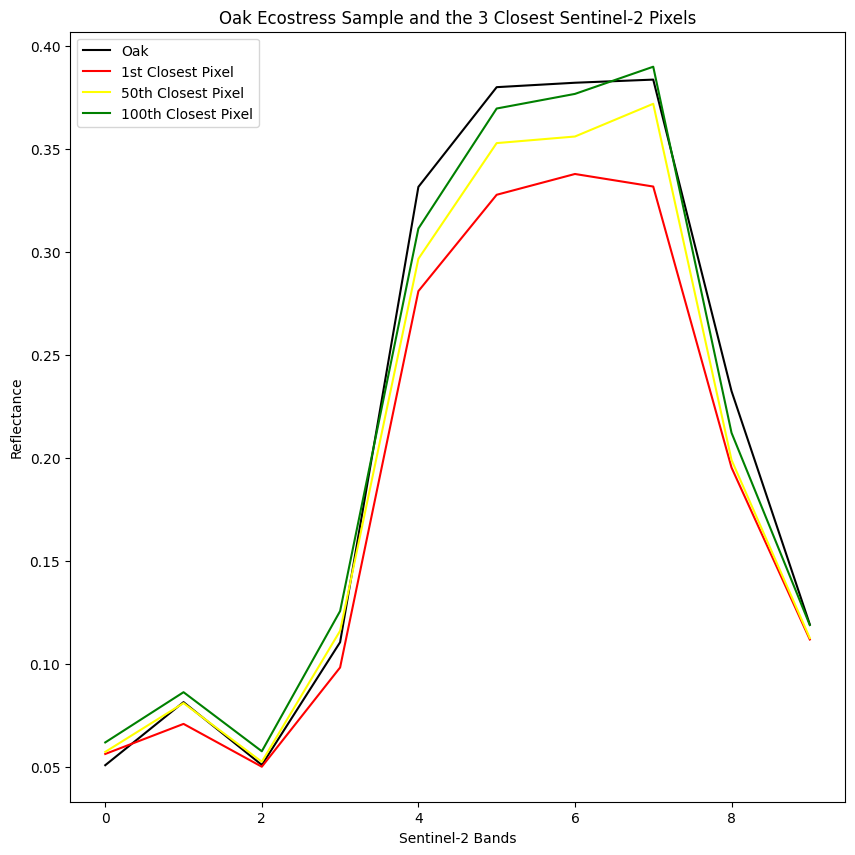

In [19]:
plt.figure(figsize=(10,10))
#print(ds_asphalt)
#print(valid_data[asphalt_100_indexes[0]])
#print(valid_data[asphalt_100_indexes[49]])
#print(valid_data[asphalt_100_indexes[99]])
plt.plot(new_bands.keys(), ds_trees, color='black', label='Oak')
plt.plot(new_bands.keys(), valid_data[tree_100_indexes[0]], color='red', label='1st Closest Pixel')
plt.plot(new_bands.keys(), valid_data[tree_100_indexes[49]], color='yellow', label='50th Closest Pixel')
plt.plot(new_bands.keys(), valid_data[tree_100_indexes[99]], color='green', label='100th Closest Pixel')
plt.legend()
plt.title("Oak Ecostress Sample and the 3 Closest Sentinel-2 Pixels")
plt.ylabel('Reflectance')
plt.xlabel('Sentinel-2 Bands')
plt.show()

As we can see in the plots above, the original spectra of the ECOSTRESS data and the 1st, 50th, and 100th closest matches have a similar shape in both the Asphalt and Oak data sets. However, the Asphalt pixel plots deviate more from the original spectra compared to the Oak spectras, having a higher reflectance than gradually gettting closer to the original. This is the same for oak but the closest pixel has the lowest reflectance, gradually becoming similar to the original sample. The asphalt spectras increase steadily while the oak spectras increase and then drop, having more variable change across the bands. 

0.09384087998847992
0.07345410191431836


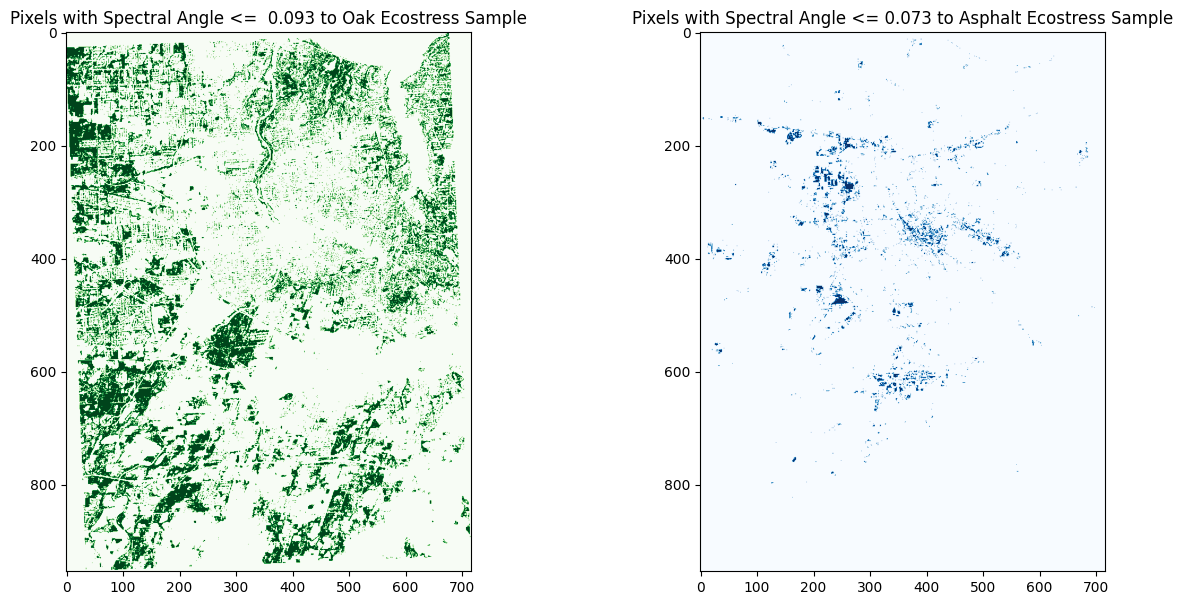

In [20]:
#print(valid_data[asphalt_100_indexes[99]])
#print(valid_data[tree_100_indexes[99]])

asphalt_cut = asphalt_angles[asphalt_100_indexes[99]] + 0.05
tree_cut = tree_angles[tree_100_indexes[99]] + 0.05
print(tree_cut)
print(asphalt_cut)

tree_cut_angles = tree_angles <= tree_cut
asphalt_cut_angles = asphalt_angles <= asphalt_cut

final_tree = np.full(rows * cols, False)
final_asphalt = np.full(rows * cols, False)
final_tree[valid_pixels] = tree_cut_angles
final_asphalt[valid_pixels] = asphalt_cut_angles
tree_image = final_tree.reshape((rows, cols))
asphalt_image = final_asphalt.reshape((rows, cols))

fit, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(tree_image, cmap='Greens')
ax[0].set_title('Pixels with Spectral Angle <=  0.093 to Oak Ecostress Sample')
ax[1].imshow(asphalt_image, cmap='Blues')
ax[1].set_title('Pixels with Spectral Angle <= 0.073 to Asphalt Ecostress Sample')
plt.show()


Finally, we used 0.093 radians for the cut off for the Oak Samples and 0.073 Radians for the Asphalt Samples as threshold values to grab all the vegetation/road pixels in our sentinel-2 imagery. 